# Экзаменационная работа
Кирилкин Владимир ПИ18-2

Вариант 2.

Данный вариант предполагает фокусировку на исследовании данных и визуализации. При решении этого варианта следует провести как можно более подробный описательный анализ данных с использованием максимального спектра средств визуализации. При этом следует делать значимые выводы об обнаруженных в данных закономерностях.

Описательный анализ и визуализация данных. Датасет: https://www.kaggle.com/lodetomasi1995/income-classification

Датасет о классификации доходов



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

Структура датасета
* age: возраст
* workclass: тип работы.
* fnlwgt: continuous.
* education: образование.
* education-num: continuous.
* marital-status: материальный статус
* occupation: профессия
* relationship: отношения.
* race: раса.
* sex: пол.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: часов работы в неделю.
* native-country: страна рождения

In [2]:
data = pd.read_csv("income_evaluation.csv")
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# удаление пробелов в именах колонок
stripped_columns = []
for item in list(data.columns):
    item = item.strip()
    stripped_columns.append(item)
data.columns = stripped_columns
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


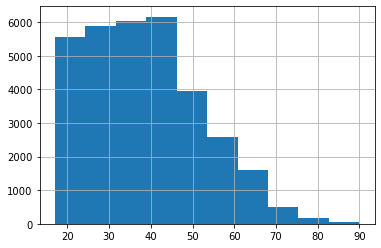

In [13]:
data.age.hist()

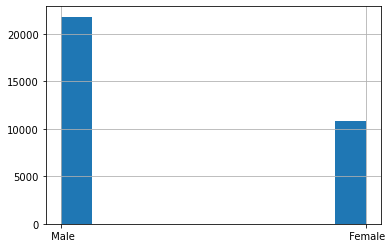

In [14]:
data["sex"].hist()

Можно заметить что распределение мужчин и женщин 2:1

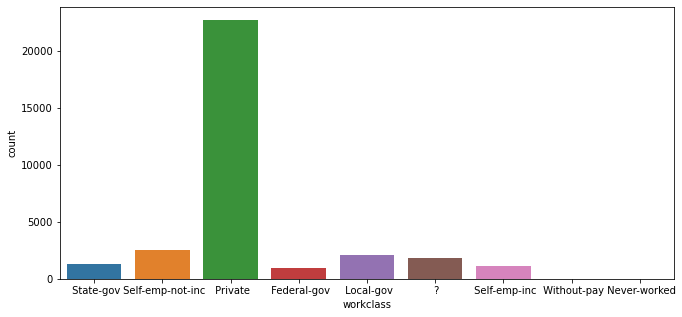

In [20]:
plt.figure(figsize=(11, 5))
sns.countplot(x=data.workclass, data=data)

Больше всего людей занято в частных компаниях, на втором месте госучереждения

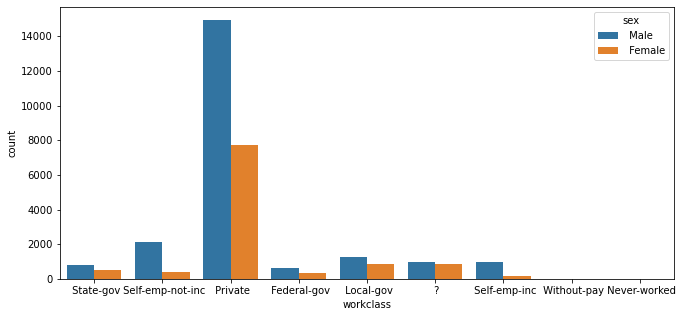

In [24]:
plt.figure(figsize=(11, 5))
sns.countplot(x=data.workclass, data=data, hue="sex")

Если посмотреть на этот график в разрезе пола, то можно заметить что в частных компаниях ситуация аналогична общему распределению, а в госучереждениях распределение изменяется в сторону увеличения количества женщин

Однако в случае самозанятых распределение изменяется в сторону преобладания мужчин

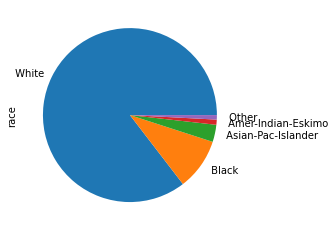

In [45]:
data.race.astype('category').value_counts().plot.pie()

Распределение выборки по рассам


In [83]:
workclasses = data.groupby(["workclass", "race"]).aggregate({"age": "count"}).rename({'age': 'count'}, axis=1)
workclasses

count
workclass         race                      
 ?                 Amer-Indian-Eskimo     25
                   Asian-Pac-Islander     65
                   Black                 213
                   Other                  23
                   White                1510
 Federal-gov       Amer-Indian-Eskimo     19
                   Asian-Pac-Islander     44
                   Black                 169
                   Other                   7
                   White                 721
 Local-gov         Amer-Indian-Eskimo     36
                   Asian-Pac-Islander     39
                   Black                 288
                   Other                  10
                   White                1720
 Never-worked      Black                   2
                   White                   5
 Private           Amer-Indian-Eskimo    190
                   Asian-Pac-Islander    713
                   Black                2176
                   Other                 213
                   White               19404
 Self-emp-inc      Amer-Indian-Eskimo      2
                   Asian-Pac-Islander     46
                   Black                  23
                   Other                   5
                   White                1040
 Self-emp-not-inc  Amer-Indian-Eskimo     24
                   Asian-Pac-Islander     73
                   Black                  93
                   Other                   9
                   White                2342
 State-gov         Amer-Indian-Eskimo     15
                   Asian-Pac-Islander     58
                   Black                 159
                   Other                   4
                   White                1062
 Without-pay       Asian-Pac-Islander      1
                   Black                   1
                   White                  12

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000221F94A54C0>],
      dtype=object)

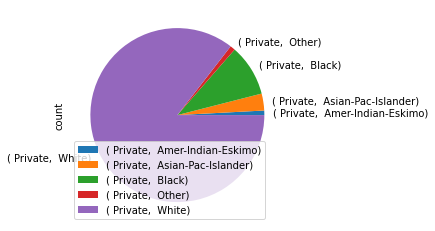

In [84]:
workclasses.query("workclass == ' Private'").plot.pie(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000221F9506CA0>],
      dtype=object)

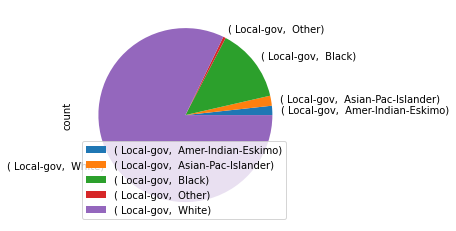

In [85]:
workclasses.query("workclass == ' Local-gov'").plot.pie(subplots=True)

Распределение по рассам на разных работах разное

Белых больше в частных компаниях (от общего распределения), в то время как в локальных госучереждениях больше черных

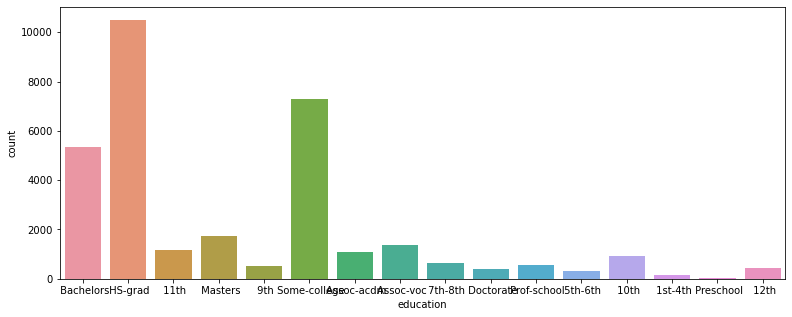

In [53]:
plt.figure(figsize=(13, 5))
sns.countplot(x=data.education, data=data)

c:\users\admin\pycharmprojects\ml_course\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


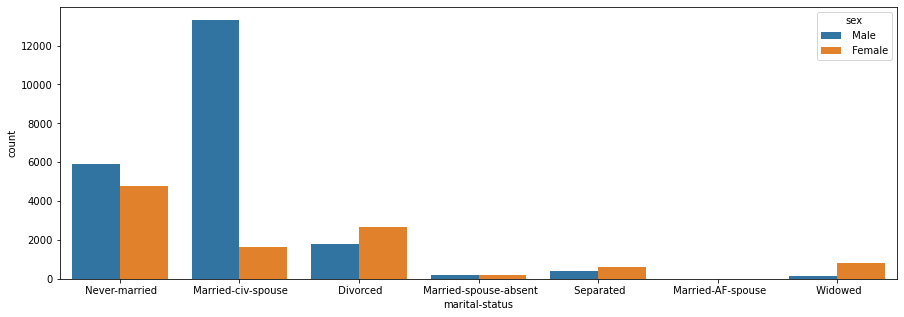

In [63]:
plt.figure(figsize=(15,5))
sns.countplot("marital-status",data=data,hue="sex")

c:\users\admin\pycharmprojects\ml_course\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


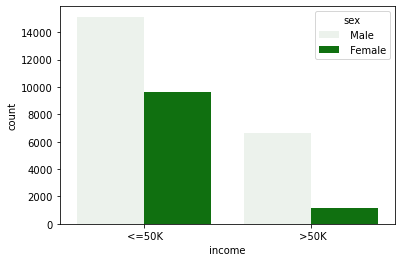

In [64]:
sns.countplot("income",data=data,hue="sex",color="green")

c:\users\admin\pycharmprojects\ml_course\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


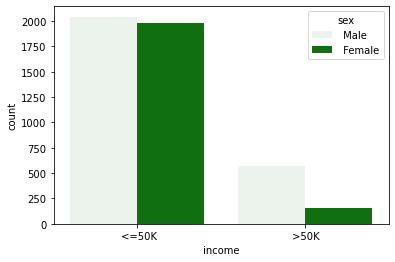

In [68]:
sns.countplot("income",data=data[data.race != ' White'],hue="sex",color="green")

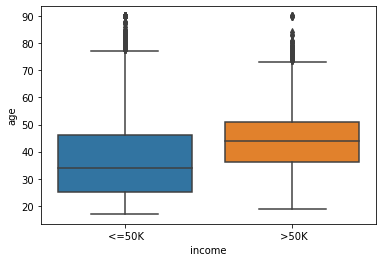

In [82]:
sns.boxplot(x=data['income'],y=data['age'])

Работающие женщины в большинстве старше, позже начинают работать, но при этом заканчивают работать раньше

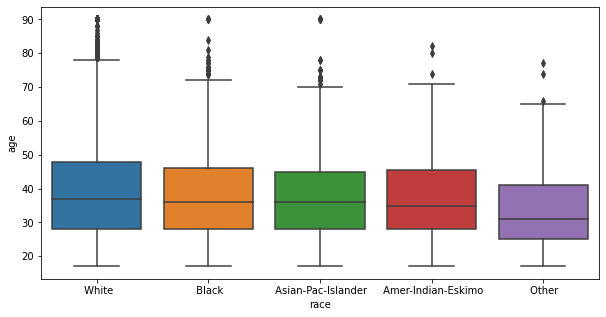

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['race'],y=data['age'],)

Белые люди работают дольше остальных, но начинают работу как и все

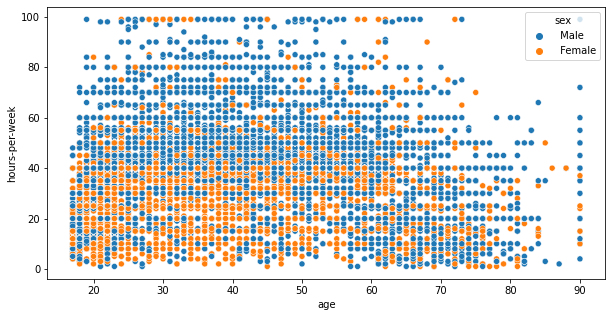

In [88]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="age",y="hours-per-week",hue="sex",data=data)

Работающих сверх 40 часов в неделю мужчин гораздо больше чем женщин

По мере старения работающих сверхурочно становится меньше

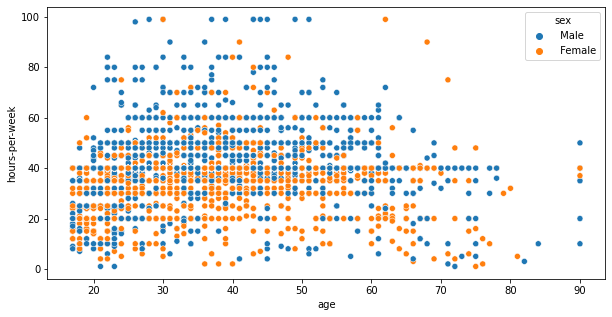

In [90]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="age",y="hours-per-week",hue="sex",data=data[data.race != ' White'])



Белых людей работающих сверх 40 часов в неделю заметно больше, возможно изза особеностей выборки


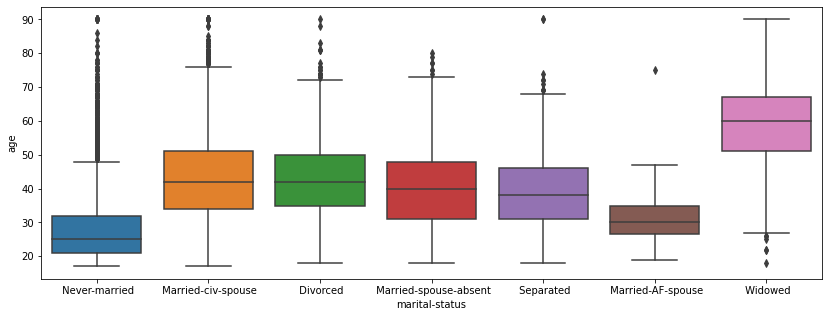

In [94]:
plt.figure(figsize=(14,5))
sns.boxplot(x=data['marital-status'],y=data['age'],)

Распределение возраста и материального статуса

Ни разу не женатые - самые моложые, а овдавевшие - самые старые, что вполне логично.

Однако овдавевшие встречаются и с 20 лет

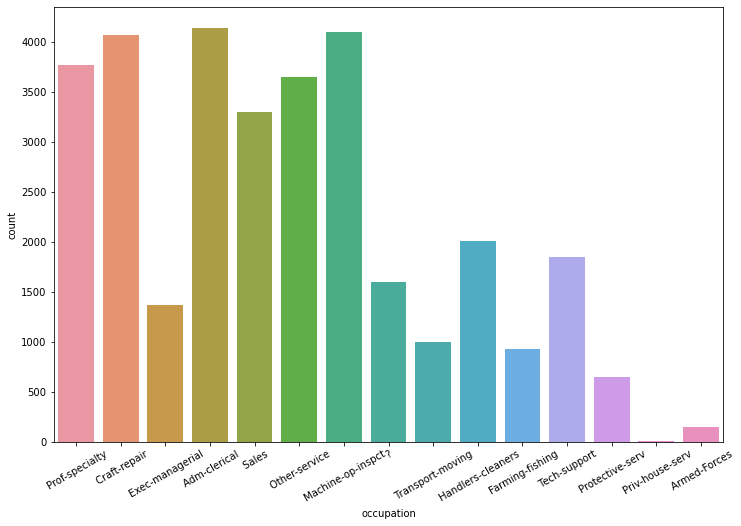

In [97]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=data,)
ax.set_xticklabels(data.occupation.value_counts().index, rotation=30)
plt.show()

Больше всего людей занято в ремонте, администрировании и инспекции машин (не совсем понял что это)



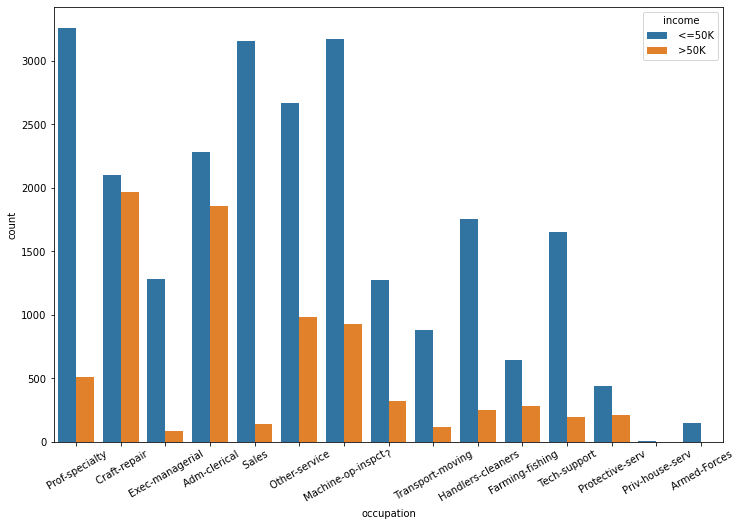

In [100]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=data,hue="income")
ax.set_xticklabels(data.occupation.value_counts().index, rotation=30)
plt.show()

А тут мы видем зависимость зарплат от работы

В ремоне больше всего шансов зарабатывать больше 50к

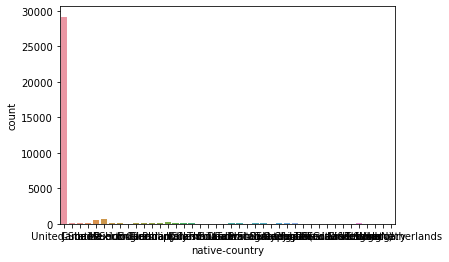

In [99]:
sns.countplot(x="native-country", data=data)

Почти все люди в выборки из америки

